<function matplotlib.pyplot.show(*args, **kw)>

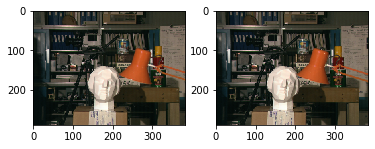

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

img1 = cv2.imread("img1.ppm")
img2 = cv2.imread("img2.ppm")
left_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
right_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2)
plt.show

In [ ]:
import sys

# max_offset = 30
window_size = 5
offset = int(window_size/2)
h, w = left_img.shape
Disparity = np.zeros(left_img.shape, dtype=np.uint8)
# E_row = np.zeros(w, dtype=np.float)
# offset_adjust = 255/max_offset #for mapping to 0-255 range
for y in range(offset, h-offset):
    for x in range(offset, w-offset):
        best_offset = 0
        prev_ssd = 65534
        for d in range(w-offset-x):#max_offset):#x, w-offset):
            ssd = 0
#             ssd_temp = 0 
            for i in range(-offset, offset+1):
                for j in range(-offset, offset+1):
                    ssd = ssd + ((int(left_img[y+i, x+j])-int(right_img[y+j, x+i-d]))**2)
#                     ssd = ssd + ((int(right_img[y+i, x+d+j])-int(left_img[y+i, x+j]))**2)
#             new_E = (img2g[int(y-offset):int(y+offset+1)  , int(d-offset):int(d+offset+1)]-img1g[int(y-offset):int(y+offset+1), int(x-offset):int(x+offset+1)]) #sum of the power of the slices
#             new_E = np.dot(new_E, new_E)
#             new_E = np.sum(new_E)
            if ssd < prev_ssd:
                prev_ssd = ssd
                best_offset = d
        Disparity[y,x] = best_offset * 255/(w-offset-x) #* offset_adjust (255)
#         Disparity[int(y-offset):int(y+offset+1), int(x-offset):int(x+offset+1)].fill(abs(x-coord))
#         print(Disparity[y,x])

plt.figure()
plt.imshow(Disparity, cmap='jet')
plt.colorbar()
plt.show

In [ ]:
for y in range(offset, h-offset):
    for x in range(offset, w-offset):
        best_offset = 0
        prev_ncc = 65534
        for d in range(w-offset-x):
            left_patch = left_img[int(y-offset):int(y+offset+1)  , int(x-offset):int(x+offset+1)]
            right_patch = right_img[int(y-offset):int(y+offset+1)  , int(x+d-offset):int(x+d+offset+1)]
            left_mean = np.mean(left_patch)
            right_mean = np.mean(right_patch)
            num = np.mean((left_patch-left_mean)*(right_patch-right_mean))
            den = np.sqrt((np.mean((left_patch - left_mean)**2))*(np.mean((right_patch - right_mean)**2)))
            ncc = abs(num/den)
            if ncc < prev_ncc:
                prev_ncc = ncc
                best_offset = d
        Disparity[y,x] = best_offset * 255/(w-offset-x)
                
plt.figure()
plt.imshow(Disparity, cmap='jet')
plt.colorbar()
plt.show            